# 1. 카메라 스티커앱 만들기 첫걸음

## 1-1. 카메라 스티커앱 만들기 첫걸음

### 일단 한 번 만들어보자!
---
스마트폰 시대에 모두가 가지고 있는 얼굴인식 카메라앱! 사용해보셨나요?

저도 부모님, 친구들, 연인과 함께 즐겁게 사용하고 있습니다. 컴퓨터 비전 기술로 사람들에게 즐거움을 줄 수 있다는 사실은 언제나 열정을 샘솟게 하는 것 같습니다.
이번 코스에서는 얼굴인식 카메라앱을 따라 만들어 보겠습니다.

이번 코스를 통해

1. 카메라앱 만들기를 통해 동영상 처리, 검출, 키포인트 추정, 추적, 카메라 원근의 기술을 다룹니다.
2. 간단한 스티커부터 시작해서 각도 변화가 가능하고 거리 변화에 강건한 스티커까지 만들 수 있습니다.
---
이번 시간의 목표는 "일단 한번 만들어 보자" 입니다.

오늘은 직접 사진 한 장을 찍고 머리에 왕관 씌워 보는 것 까지 다루겠습니다.

### 학습 목표
---
- 얼굴인식 카메라의 흐름을 이해합니다.
- dlib 라이브러리 사용하여 실습해봅니다.
- 이미지 배열의 인덱싱 예외 처리를 익힙니다.

### 학습 내용
---
- 어떻게 만들까? 사진 준비하기
- OpenCV 라이브러리를 통해 실습을 준비합니다.
- 얼굴 검출 face detection
- face detection 실습을 해봅니다.
- 얼굴 랜드마크 face landmark
- 이미지에 face landmark를 적용합니다.
- 스티커 적용하기
- 스티커 적용하기를 통해 어플의 초기 버전을 완성합니다.

### 준비물
---
오늘 사용할 왕관 이미지입니다.

아래의 이미지는 png(Portable Network Graphics) 파일로, 무손실 압축을 사용하기 때문에 이미지 손실이 없고 고품질 이미지를 생성하여 이미지 편집에 많이 사용되는 파일입니다. png 파일은 배경이 투명해서 배경 이미지 위에 png 파일을 얹어 두 이미지를 자연스럽게 합성시킬 수 있습니다.

아래의 이미지에서는 보이지 않지만 이미지 파일을 다운로드하여 확인해보면 배경이 체커판 패턴으로 보이는데, 이 부분이 투명한 부분입니다. jpeg 등과 같은 다른 이미지 파일을 사용하면 배경을 지우는 등의 추가 처리가 필요하므로 배경이 없는 png 파일을 사용하는 것이 훨씬 빠르고 간편합니다. 그러므로 만약 다른 이미지를 스티커로 사용하고 싶다면 png 파일을 사용하는 것이 좋습니다.



## 1-2. 어떻게 만들까? 사진 준비하기
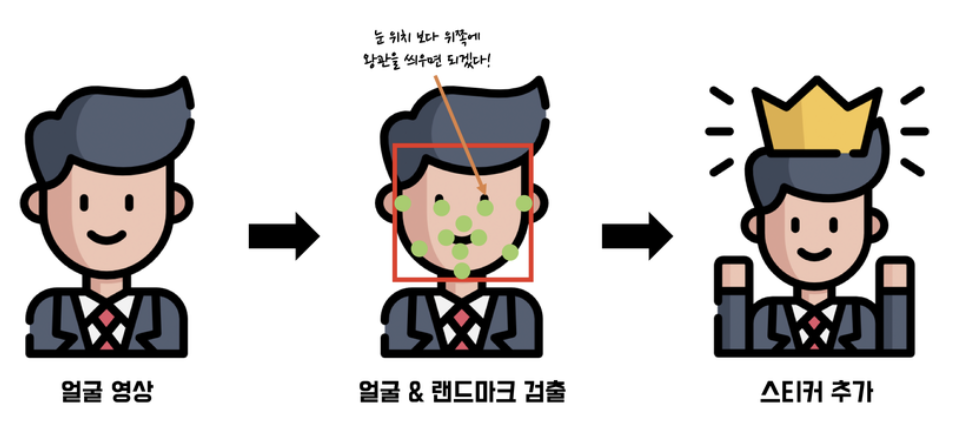

스티커를 세밀하고 자연스럽게 적용하기 위해서 눈, 코, 입, 귀와 같은 얼굴 각각의 위치를 아는 것이 중요합니다.
 이 위치들을 찾아내는 기술을 **랜드마크 landmark** 또는 **조정 alignment** 이라고 합니다. 조금 더 큰 범위로는 keypoint detection 이라고 부르고 있습니다. 대부분의 face landmark 데이터셋은 눈, 코, 입과 턱을 포함하고 있습니다.
 얼굴의 랜드마크를 찾아냈다면 머리의 위치를 예상하는 것은 쉽습니다. 눈과 코의 위치로부터 위로 떨어져 있는 정도를 데이터로부터 유추할 수 있을 겁니다.

따라서 우리는,

1. 얼굴이 포함된 사진을 준비하고
2. 사진으로부터 얼굴 영역 face landmark 를 찾아냅니다.
    (landmark를 찾기 위해서는 얼굴의 bounding box를 먼저 찾아야합니다.)
3. 찾아진 영역으로 부터 머리에 왕관 스티커를 붙여넣겠습니다.

In [ ]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 
print("🌫🛸")

In [ ]:
# 여기서 위치에 파일이 존재하지 않는다는 오류가 있는데 왜 그런지 모르겠다.
# LMS에서는 해당 코드가 이상 없이 잘 돌아가기에 우선은 그냥 진행하도록 한다.

my_image_path = 'aiffel/workplace/240604-camera-sticker/images/image.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

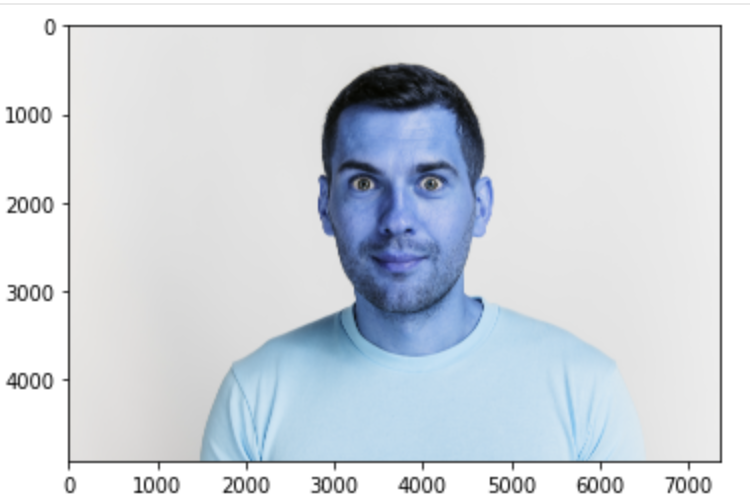

그런데 좀 이상하지 않으신가요? 사진이 잘 나온것 같긴 한데 색상이 좀 이상합니다. 얼굴 색에 왜이렇게 푸른빛이 감도는 걸까요? 이것은 opencv의 특징 때문입니다. 오늘 사용하게 될 matplotlib, dlib 등의 이미지 라이브러리는 모두 이미지 채널을 RGB(빨강, 녹색, 파랑) 순으로 사용합니다. 그런데 opencv는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용합니다. 그래서 여러분의 원본 사진에서 붉은색은 푸른색으로, 푸른색은 붉은색으로 바뀌어 출력된 것입니다. 그래서, opencv에서 다룬 이미지를 다른 이미지 라이브러리를 활용하여 출력하려면 아래와 같은 색깔 보정처리를 해주게 됩니다.

In [ ]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

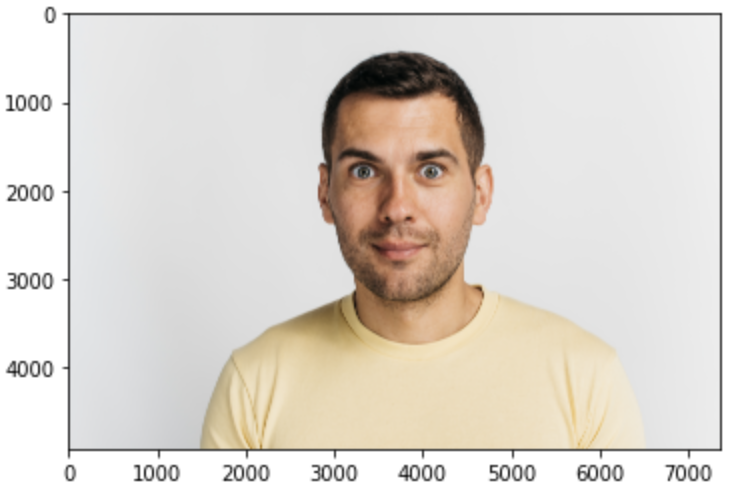

opencv는 아주 강력하고 방대한 기능을 갖춘 컴퓨터 비전 라이브러리입니다. 영상 관련 업계 표준 라이브러리의 지위를 가지고 있다고 할 수 있겠습니다.
 아래 링크의 페이지를 방문해 봅시다. 어쩌면 앞으로도 자주 찾게 될지 모르겠군요. 한번 훑어본 후 아래 질문에 답변해 봅시다.


## 1-3. 얼굴 검출 face detection

Object detection 기술을 이용해서 얼굴의 위치를 찾겠습니다. 이번 시간에는 빠르게 만들기 위해 학습 없이 공개되어 있는 패키지를 사용하겠습니다.

dlib의 face detector는 HOG(Histogram of Oriented Gradients)와 SVM(Support Vector Machine)을 사용해서 얼굴을 찾습니다.

HOG는 이미지에서 색상의 변화량을 나타낸 것입니다. 딥러닝이 나오기 이전에 다양하게 사용되던 방식인데요. 이미지에서 단순히 색상값만 가지고 할 수 있는 일이 제한적이었기 때문에 색상의 변화량을 계산한 HOG는 굉장히 큰 도움이 되었습니다. 이미지로부터 물체의 특징만 잘 잡아내는 능력을 갖출 수 있었거든요. 2000년대 초반에도 얼굴을 인식해 카메라 초점을 잡는 기능 등에는 모두 이 방식이 응용되었습니다.

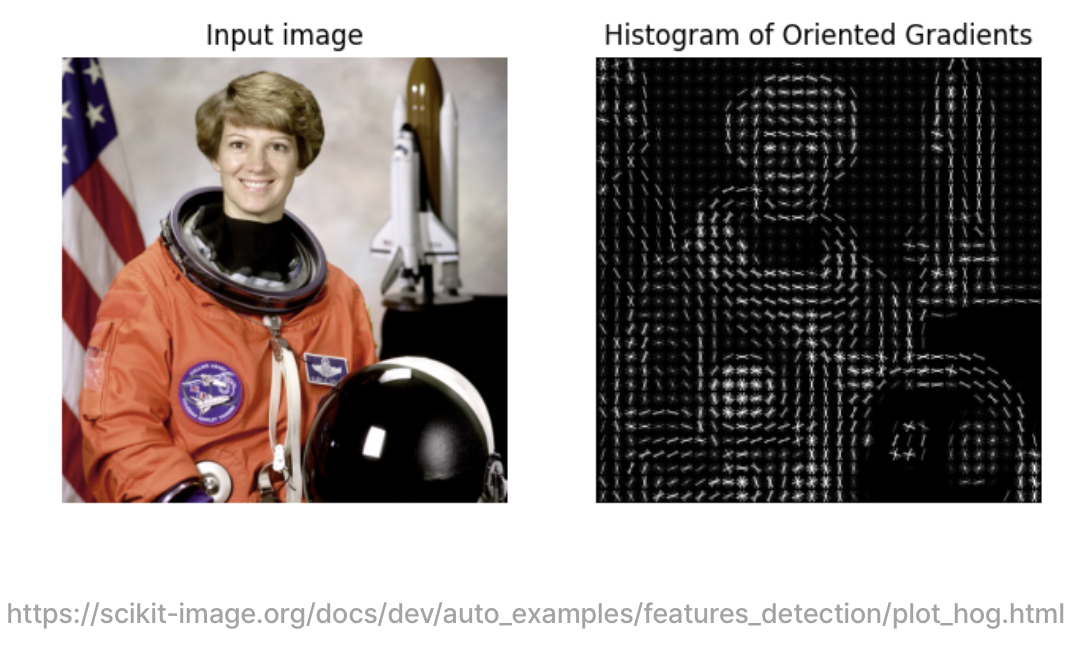

HOG를 시각화한 이미지에서 사람의 형체가 잘 보이시나요?

SVM은 선형 분류기입니다. 한 이미지를 다차원 공간의 한 벡터라고 보면 여러 이미지는 여러 벡터가 될텐데요. 이 여러 벡터를 잘 구분짓는 방법입니다. 여기서는 얼굴이냐 아니냐를 구분하는 것이 중요하겠죠.

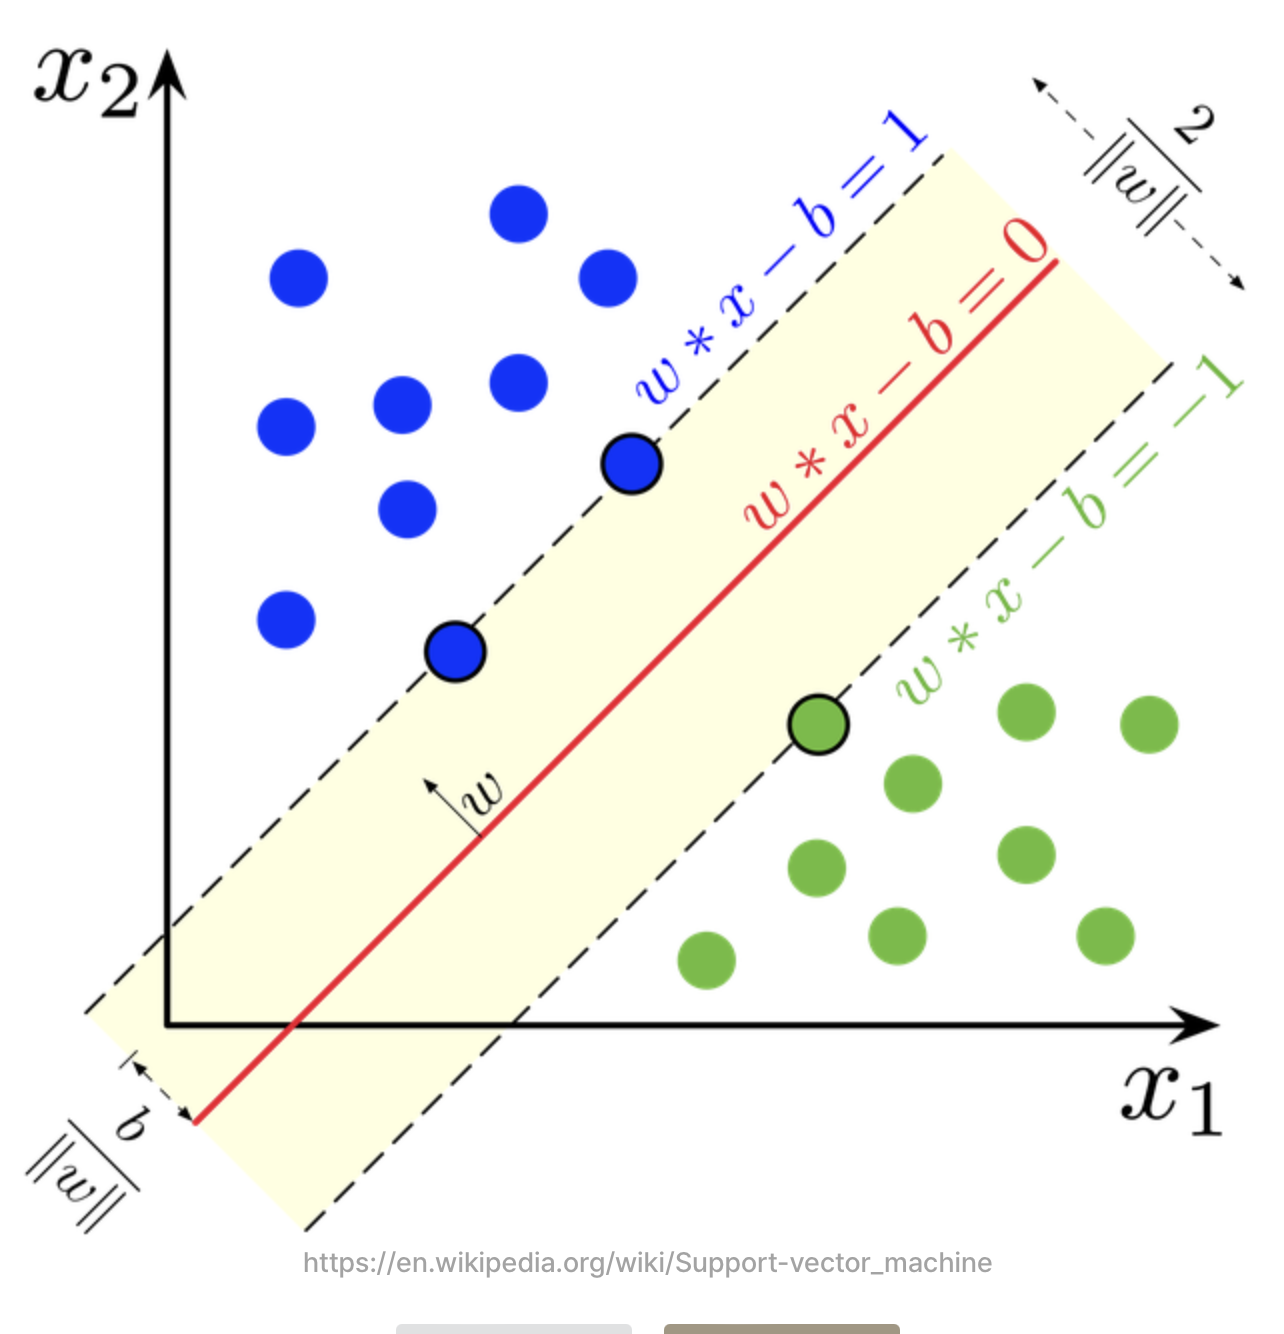

이미지의 색상만 가지고는 SVM이 큰 힘을 발휘하지 못합니다. 하지만 이미지가 HOG를 통해 벡터로 만들어진다면 SVM이 잘 작동합니다.

그렇다면 얼굴의 위치는 어떻게 찾을 수 있을까요? 바로 sliding window를 사용합니다. sliding window는 작은 영역(window)을 이동해가며 확인하는 방법을 말합니다. 큰 이미지의 작은 영역을 잘라 얼굴이 있는지 확인하고, 다시 작은 영역을 옆으로 옮겨 얼굴이 있는지 확인하는 방식이겠네요. 물론 이렇게 한다면 이미지가 크면 클수록 오래걸리는 단점이 있습니다. 바로 이 지점이 딥러닝이 필요해지는 이유이기도 하지요.
그럼 dlib을 활용해 hog detector를 선언해 보겠습니다.

In [ ]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

detector_hog를 이용해서 얼굴의 bounding box를 추출합니다.

In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환해 주었습니다.

detector_hog의 두 번째 파라미터는 이미지 피라미드의 수입니다. 이미지를 upsampling 방법을 통해 크기를 키우는 것을 이미지 피라미드라고 합니다. 이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능합니다. 이미지 피라미드에 대한 내용은 아래 링크를 참고해 주세요.

- Image Pyramids (https://opencv-python.readthedocs.io/en/latest/doc/14.imagePyramid/imagePyramid.html)

>➰ upsampling이란,
간단하게 데이터의 크기를 키우는 것입니다. 일반적으로 CNN의 레이어를 통과하면서 이미지의 크기를 줄이는 것을 down sampling이라고 하는데, down sampling의 반대 개념이 upsampling인 셈이죠.

찾은 얼굴을 화면에 출력해보겠습니다.

In [ ]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

dlib detector 는 dlib.rectangles 타입의 객체를 반환합니다. dlib.rectangles 는 dlib.rectangle 객체의 배열 형태로 이루어져 있습니다.

dlib.rectangle객체는 left(), top(), right(), bottom(), height(), width() 등의 멤버 함수를 포함하고 있습니다. 더 자세한 정보는 dlib docs를 참고해주세요.

- dlib.rectangles (http://dlib.net/python/index.html#dlib.rectangles)

## 1-4. 얼굴 랜드마크 face landmark

앞서 말씀 드린 것처럼 스티커를 섬세하게 적용하기 위해서는 이목구비의 위치를 아는 것이 중요합니다. 이목구비의 위치를 추론하는 것을 face landmark localization 기술이라고 합니다. face landmark는 detection 의 결과물인 bounding box 로 잘라낸(crop) 얼굴 이미지를 이용합니다.

**Object keypoint estimation 알고리즘**

Face landmark와 같이 객체 내부의 점을 찾는 기술을 object keypoint estimation이라고 합니다.
keypoint를 찾는 알고리즘은 크게 2가지로 나누어 집니다.

1. top-down : bounding box를 찾고 box 내부의 keypoint를 예측
2. bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성
이번 예제에서는 1번 방식을 다룹니다.

### Dlib landmark localization
---
잘라진 얼굴 이미지에서 아래 68개의 이목구비 위치를 찾습니다.

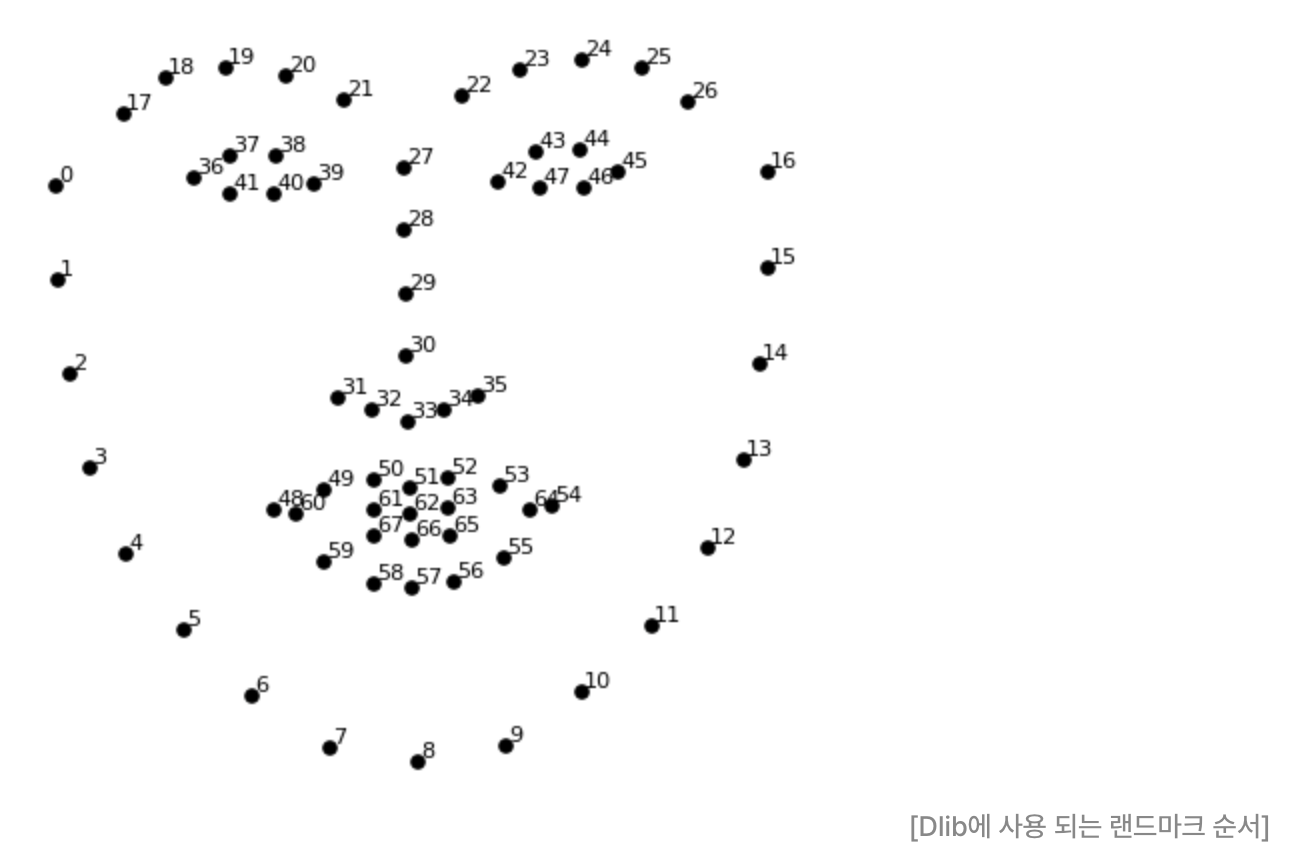

이 때 점의 개수는 데이터셋과 논문마다 다릅니다. 예를 들면, AFLW 데이터셋은 21개를 사용하고 ibug 300w 데이터셋은 68개를 사용합니다.

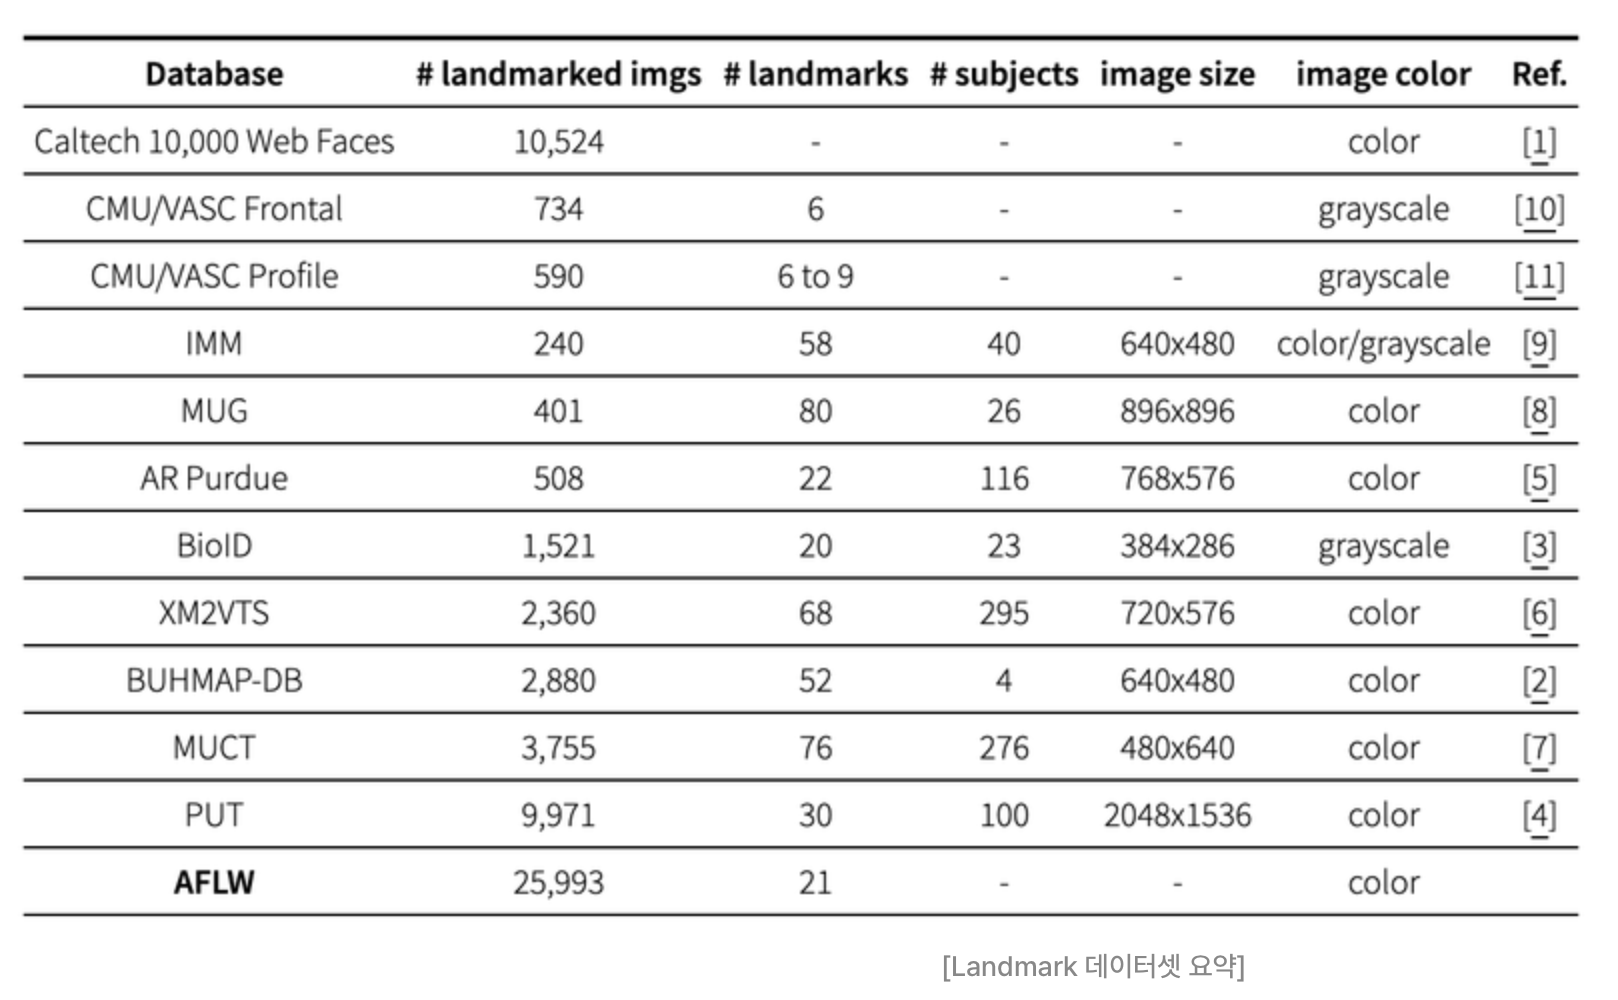

- AFLW dataset 

Dlib은 ibug 300-W 데이터셋으로 학습한 pretrained model 을 제공합니다. 학습 알고리즘은 regression tree의 앙상블 모델을 사용 했습니다. 자세한 내용이 궁금하신 분들은 2014년 CVPR (Computer Vision and Pattern Recognition) 에 발표한 논문One Millisecond Face Alignment with an Ensemble of Regression Trees 을 참고해 주세요. 오늘은 알고리즘을 이해하지 않아도 괜찮습니다.

- One Millisecond Face Alignment with an Ensemble of Regression Trees (https://www.cv-foundation.org/openaccess/content_cvpr_2014/papers/Kazemi_One_Millisecond_Face_2014_CVPR_paper.pdf)

Dlib의 제공되는 모델을 사용해보겠습니다. 먼저 공개되어 있는 weight file을 다운로드 받습니다. 해당 모델파일은 bz2 압축파일 형태로 제공되어 압축을 풀어준 후 사용하겠습니다.

```C
wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2
```

저장한 landmark 모델을 불러옵니다.